**Problem statement**
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.



Also, determine the optimal value of lambda for ridge and lasso regression.

**Business Goal**


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**Step 1: Reading and Understanding the Data**

In [77]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
# Import necessary libraries
from sklearn import metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [78]:
# reading the dataset
data = pd.read_csv("train.csv", encoding = 'utf-8')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [79]:
## check shape , info and describe
print("*********************************  Info *******************************************")
print(data.info())
print("*********************************  Shape ******************************************")
print(data.shape)
print("**************************** Describe *****************************")
print(data.describe())

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle  

**traget variable is salePrice**

In [80]:
## 2.Data Cleaning
## to find the percentage of null values in each column
# Set the display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.isnull().sum()*100/len(data)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

** data has quite a lot of null values , hence first we need to fix them .

In [81]:
# check for null values in all categorical columns

data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

 **As per data dictionary the categorigal varaibles above having null values are imp and null means its does not exist and hence can be replaced with NA**

In [82]:
# Replace NA with None in the following columns below :

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical',
            'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'):
    data[col]=data[col].fillna('None')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [83]:
# check for null values again in all categorical columns

data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

**cleaning numerical variables**


In [84]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [85]:
# Dropping ID Column
data_numeric = data_numeric.drop(['Id'], axis=1)
data_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [86]:
# check for null values again in all categorical columns

data.select_dtypes(include=['float64', 'int64']).isnull().sum()[data.select_dtypes(include=['float64', 'int64']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

In [87]:
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["Electrical"].dropna(inplace=True)

<Axes: xlabel='SalePrice', ylabel='Density'>

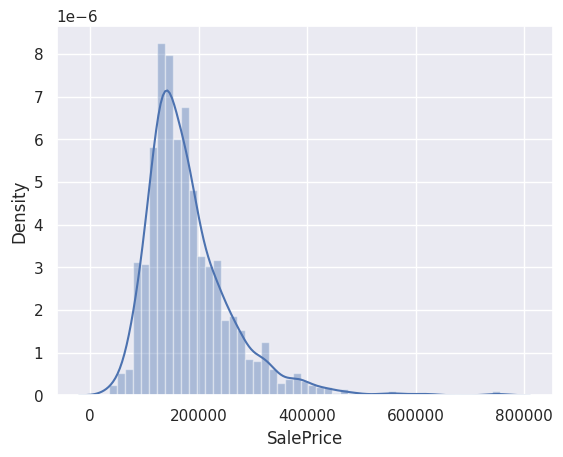

In [88]:
sns.distplot(data['SalePrice'])


Since data looks skewed towards left , we  will apply log transformation to center it

In [89]:
#log transformation
data['SalePrice']=np.log1p(data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

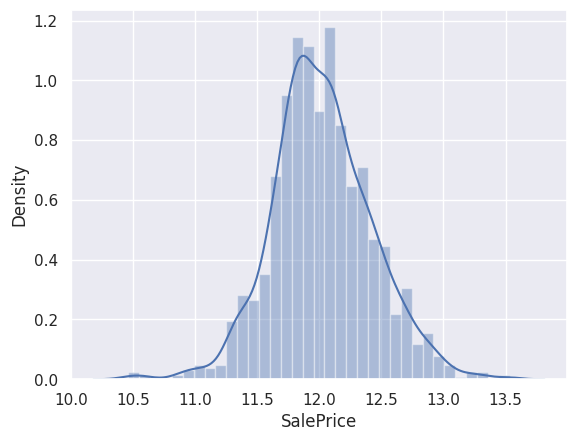

In [90]:
sns.distplot(data['SalePrice'])

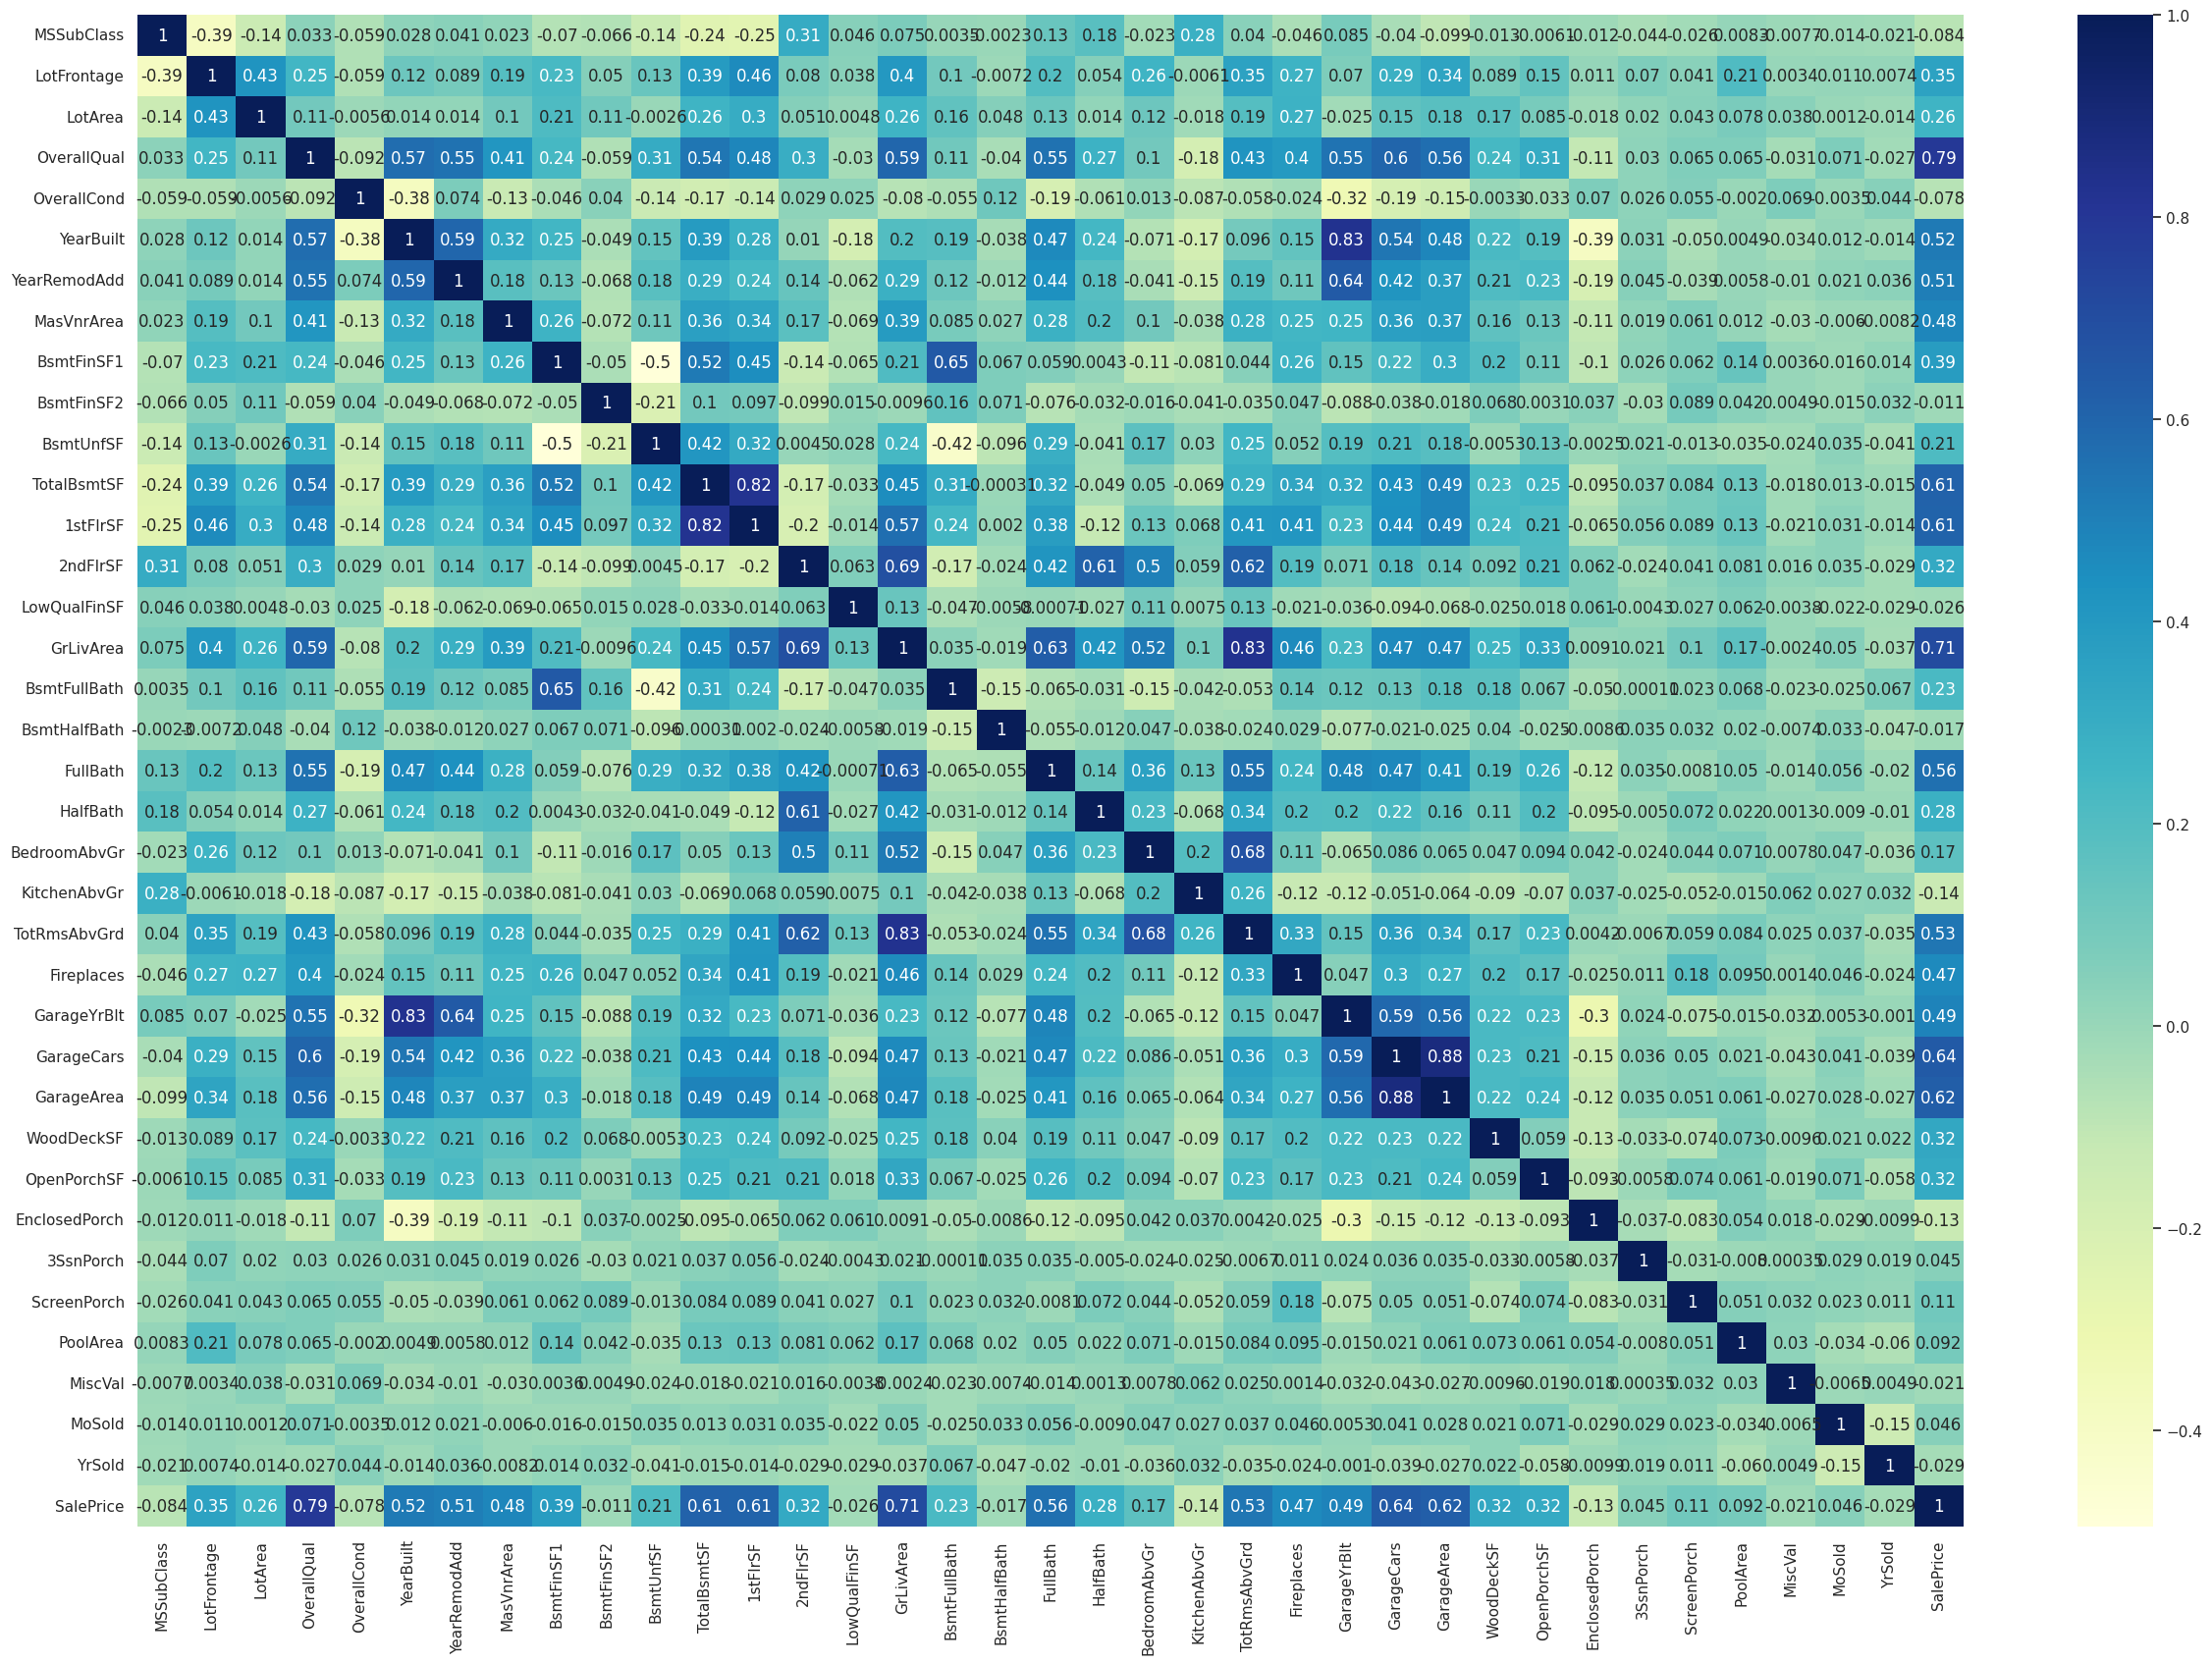

In [91]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(data_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()

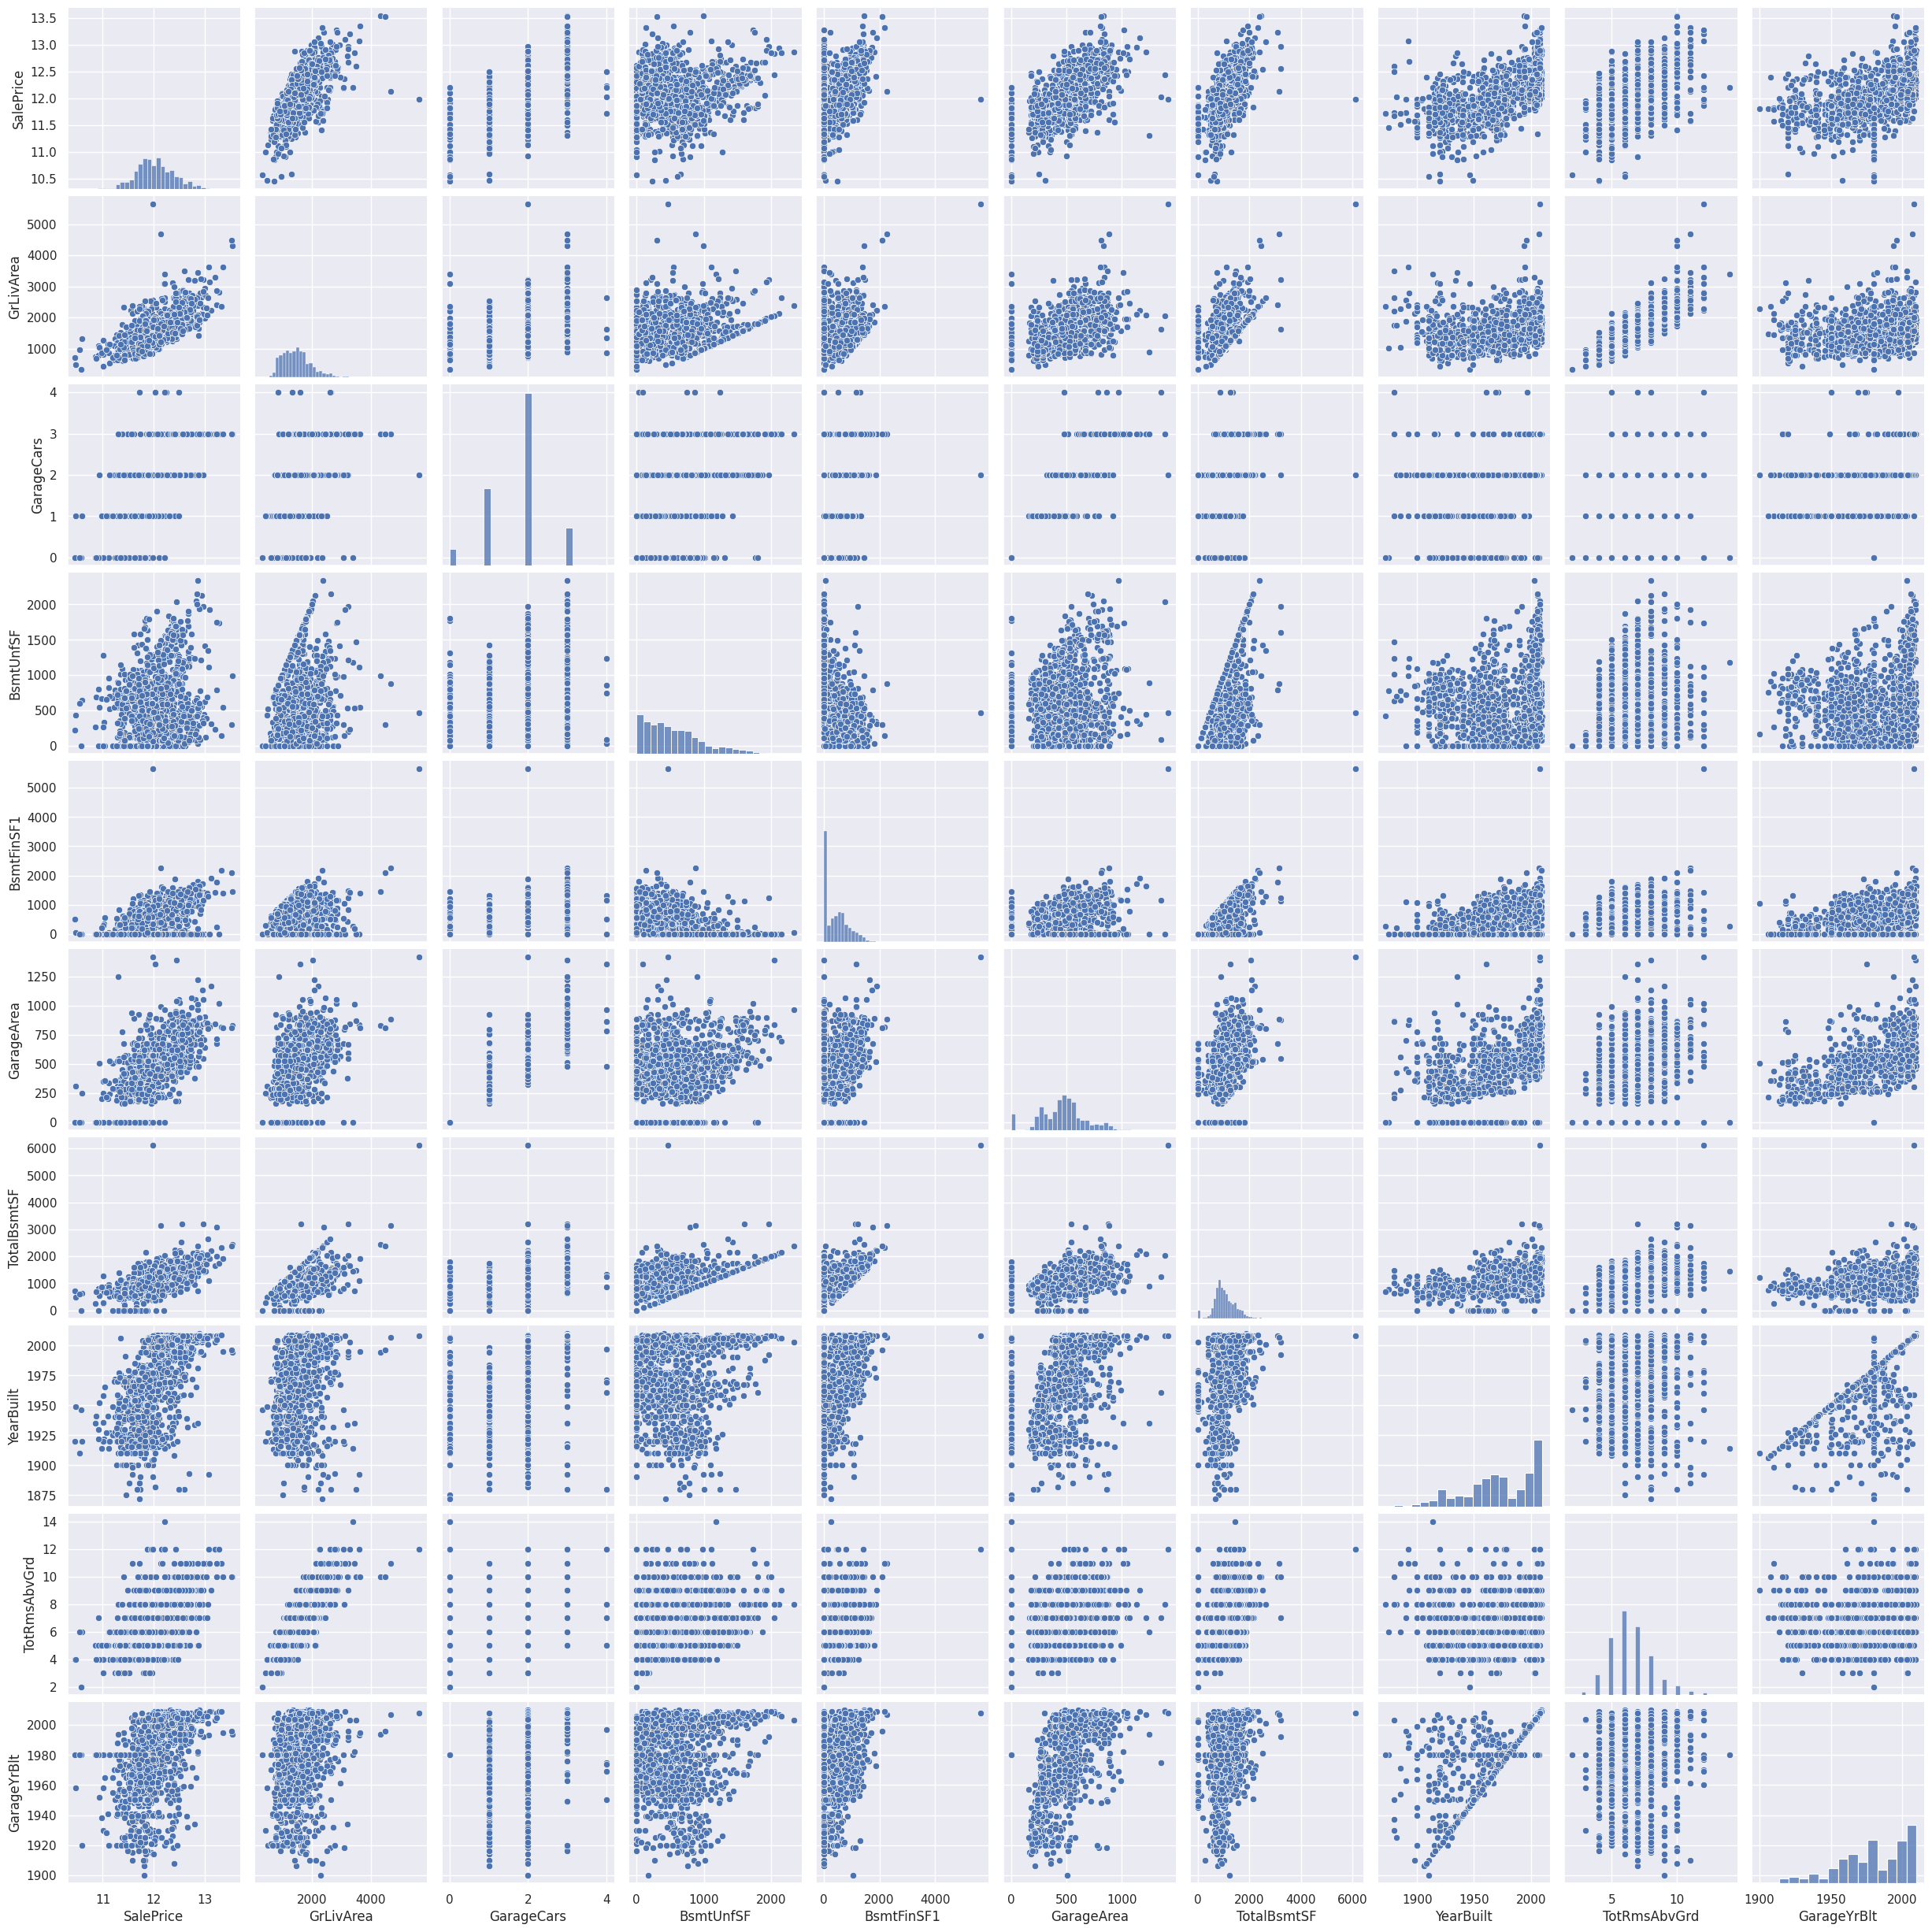

In [92]:
# Checking the same with a pairplot
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

some columns look correlated

In [93]:
data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)

data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        None     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1 

In [94]:
data.shape

(1460, 79)

In [95]:
# PropAge -  Property Age from yearsold - yearbuilt
data['PropertyAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        None     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1 

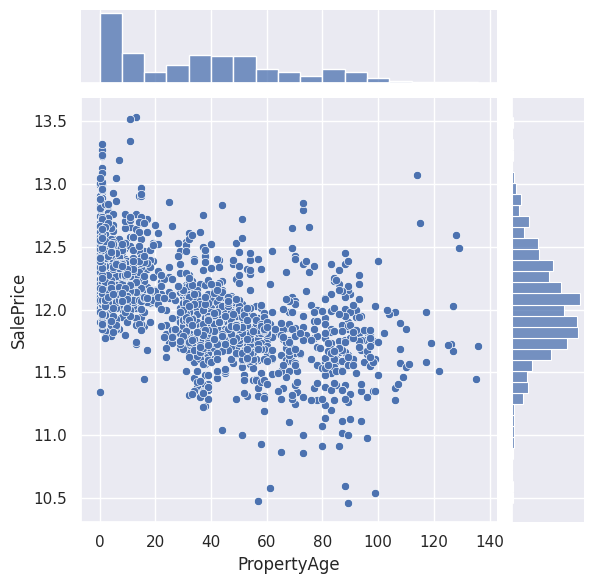

In [96]:
# PropAge vs SalePrice
sns.jointplot(x = data['PropertyAge'], y = data['SalePrice'])
plt.show()

Sale price seem to decreasing for aeging property as can can been from  jointplot above.

In [97]:
#droppping columns MoSold , YrSold,YearBuilt,YearRemodAdd
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
0          Gd        Typ           0        None     Attchd       2003.0   
1          TA        Typ           1          TA     Attchd       1976.0   
2          Gd        Typ           1          TA     Attchd       2001.0   
3          Gd        Typ           1          Gd     Detchd       1998.0   
4          Gd        Typ           1         

In [98]:
data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [99]:
data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [100]:
# Dropping columns that show very low variance  for values
data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)

**Data prepararion**

In [101]:
# Drop 'Id' from Dataframe

data = data.drop(['Id'], axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0          60       RL         65.0     8450  None      Reg         Lvl   
1          20       RL         80.0     9600  None      Reg         Lvl   
2          60       RL         68.0    11250  None      IR1         Lvl   
3          70       RL         60.0     9550  None      IR1         Lvl   
4          60       RL         84.0    14260  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu  \
0             3             1          Gd        Typ           0        None   
1             3             1          TA        Typ           1          TA   
2             3             1          Gd        Typ           1          TA   
3             3             1          Gd        Typ           1          Gd   
4             4             1          Gd        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageArea GarageQual GarageCond  \
0     Attchd       2003.0          RFn         548         TA         TA   
1     Attchd       1976.0          RFn         460         TA         TA   
2     Attchd       2001.0          RFn   

In [102]:
#type of each feature in data: int, float, object
types = data.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)]
#categorical values are type object
categorical_type = types[types == object]
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(types[(types == 'int64') | (types == float)] .index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'PropertyAge']


In [103]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


**Get dummies for catregorical variables to convert them to numerical values.**

In [104]:
data = pd.get_dummies(data, drop_first=True )
data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageYrBlt  GarageArea  \
0             3             1           0       2003.0         548   
1             3             1           1       1976.0         460   
2             3             1           1       2001.0         608   
3             3             1           1       1998.0         642   
4             4             1           1       2000.0         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  PropertyAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0        0  12.247699            5            0            0            1   
1        0  12.109016           31            0            0            1   
2        0  12.317171            7            0            0            1   
3        0  11.849405           91            0            0            1   
4        0  12.429220            8            0            0            1   

   MSZoning_RM  Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0            0           1           0             0             0   
1            0           1           0             0             0   
2            0           1           0             0             0   
3            0           1           0             0             0   
4            0           1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

In [105]:
X = data.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageYrBlt  GarageArea  \
0             3             1           0       2003.0         548   
1             3             1           1       1976.0         460   
2             3             1           1       2001.0         608   
3             3             1           1       1998.0         642   
4             4             1           1       2000.0         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  PropertyAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0        0            5            0            0            1            0   
1        0           31            0            0            1            0   
2        0            7            0            0            1            0   
3        0           91            0            0            1            0   
4        0            8            0            0            1            0   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4                0                0                1                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   
2              0              0                 1              0   
3              0              0                 0              0   
4              1              0            

In [106]:
# Putting SalePrice variable to y
y = data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [107]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']])



In [109]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
133    -0.878548     0.668017 -0.368268     1.376896    -0.520013    0.177349   
290     0.061575     2.257201  0.522089     1.376896    -0.520013   -0.563579   
24     -0.878548     0.032343 -0.226653    -0.795388     2.195526   -0.563579   
1093   -0.878548     0.032343 -0.126617    -0.795388     2.195526    0.340789   
1288    1.471758    -1.375220 -0.489144     1.376896    -0.520013   -0.563579   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
133     1.194627   -0.290350        262     0.453749  0.322470 -0.793198   
290    -0.973738   -0.290350       1079     0.037033 -0.227488  1.131227   
24     -0.568113    3.708133        204    -0.005082 -0.275641 -0.793198   
1093    0.452421   -0.290350        203    -0.439531  0.079171 -0.793198   
1288    1.524737   -0.290350        343     0.972428  1.242446 -0.793198   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
133      -0.125448  -0.428561      1.078984      -0.24287  0.791918 -0.754301   
290      -0.125448   0.758017     -0.839209      -0.24287  0.791918  1.252587   
24       -0.125448  -0.878051      1.078984      -0.24287 -1.032461 -0.754301   
1093     -0.125448  -0.611404      1.078984      -0.24287 -1.032461  1.252587   
1288     -0.125448   0.262816      1.078984      -0.24287  0.791918 -0.754301   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageYrBlt  GarageArea  \
133      -1.067877     -0.224935   -0.950249       2001.0   -0.015400   
290       0.163397     -0.224935    0.615183       2006.0    0.983912   
24        0.163397     -0.224935    0.615183       1968.0   -0.954007   
1093     -2.299151     -0.224935   -0.950249       1977.0    1.913179   
1288     -1.067877     -0.224935    0.615183       2000.0    0.115351   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
133     0.772142    -0.327420       -0.37712  -0.116888    -0.264644   
290    -0.751247     0.073786       -0.37712  -0.116888    -0.264644   
24      2.470086     0.675596       -0.37712  -0.116888    -0.264644   
1093   -0.751247     0.274389       -0.37712  -0.116888    -0.264644   
1288    0.930828     0.197234       -0.37712  -0.116888    -0.264644   

      PoolArea  MiscVal  PropertyAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
133  -0.058235        0            8            0            0            1   
290  -0.058235        0            0            0            0            1   
24   -0.058235        0           42            0            0            1   
1093 -0.058235        0           41            0            0            1   
1288 -0.058235        0            9            0            0            1   

      MSZoning_RM  Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  \
133             0           1           0             0             0   
290             0           1           0             0             0   
24              0           1           0             0             0   
1093            0           1           0             0             0   
1288            0           1           0             0             0   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
133              0                0                0                1   
290              1                0                0                1   
24               0                0                0                1   
1093             1                0                0                1   
1288             0                0                0                1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
133                   0              0              0                 1   
290                   0              0              0                 1   
24                    0              0              0                 1   
1093                  0              0            

In [110]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1436   -0.849371    -0.411078 -0.159871    -1.514448     0.368675   -0.603660   
57      0.122290     0.799498  0.091492     0.646230    -0.506554   -0.603660   
780    -0.849371    -0.285846 -0.266783     0.646230    -0.506554   -0.378321   
382     0.122290     0.382058 -0.136588     0.646230    -0.506554   -0.603660   
1170    0.608120     0.256826 -0.076242    -0.073996     0.368675   -0.603660   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
1436    0.479952   -0.286118        248    -0.453690 -0.780801 -0.803062   
57     -0.976135   -0.286118        860    -0.464121 -0.792196  1.169847   
780    -0.976135   -0.286118       1237     0.519010  0.327348 -0.803062   
382    -0.976135   -0.286118        939    -0.258107 -0.567147  1.165259   
1170    0.257757   -0.286118        574     0.151313 -0.057228 -0.803062   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1436     -0.100762  -1.196888     -0.745493     -0.234421 -1.001192 -0.791670   
57       -0.100762   0.431236     -0.745493     -0.234421  0.781418  1.134727   
780      -0.100762  -0.457004     -0.745493     -0.234421  0.781418 -0.791670   
382      -0.100762   0.577691     -0.745493     -0.234421  0.781418  1.134727   
1170     -0.100762  -0.713776      1.233452     -0.234421 -1.001192 -0.791670   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageYrBlt  GarageArea  \
1436      0.165306     -0.149696   -0.956428       1974.0    0.284420   
57        0.165306     -0.149696   -0.956428       2004.0    0.458966   
780       0.165306     -0.149696    0.545061       1995.0   -0.309979   
382       0.165306     -0.149696   -0.956428       2006.0    0.808057   
1170      0.165306     -0.149696    0.545061       1977.0   -0.517546   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1436   -0.756378    -0.676020      -0.282428  -0.116565    -0.304655   
57     -0.756378     0.301128      -0.282428  -0.116565    -0.304655   
780     1.042775    -0.382876      -0.282428  -0.116565    -0.304655   
382     0.421250     0.063821      -0.282428  -0.116565    -0.304655   
1170    0.903750    -0.676020      -0.282428  -0.116565    -0.304655   

      PoolArea  MiscVal  PropertyAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1436 -0.100719        0           36            0            0            1   
57   -0.100719        0            2            0            0            1   
780  -0.100719        0           12            0            0            1   
382  -0.100719        0            1            0            0            1   
1170  9.141044        0           31            0            0            1   

      MSZoning_RM  Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  \
1436            0           1           0             0             0   
57              0           1           0             0             0   
780             0           1           0             0             0   
382             0           1           0             0             0   
1170            0           1           0             0             0   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
1436             1                0                0                1   
57               0                0                0                1   
780              1                0                0                1   
382              0                0                0                1   
1170             1                0                0                1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
1436                  0              1              0                 0   
57                    0              0              0                 0   
780                   0              0              0                 1   
382                   0              0            

**Model evaluation and Building**

**Using  linear rgeression and RFE first to see if there is overffiting**

In [111]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [112]:
# Running RFE
#  we will run RFE to select some that have high predictive power with 100 features selected.
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select=100)

rfe = rfe.fit(X_train, y_train)

In [113]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'PoolArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandSlope_Sev', 'Neighborhood_BrDale', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAn', 'Condition1_RRNn', 'Condition2_Norm',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd'

In [114]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       ...
       'Fence_None', 'MiscFeature_None', 'MiscFeature_Shed',
       'MiscFeature_TenC', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'PropAge'],
      dtype='object', length=154)

In [115]:
X_train_rfe = X_train[col]

In [116]:
X_train_rfe = pd.DataFrame(X_train[col])
X_train_rfe.shape

(1168, 100)

In [117]:
# predict

y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9507024500739247

In [118]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.8839149488443104e+16

**its a clear case of overfiiting since test score is very low compared to train score.**

**Lasso and Ridge Regression**

In [119]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1168, 254)
y_train (1168,)


In [128]:
# Applying Lasso

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.402133      0.095483         0.011802        0.006722      0.0001   
1       0.097993      0.019534         0.009501        0.002580       0.001   
2       0.043086      0.006441         0.011950        0.002503        0.01   
3       0.018113      0.004730         0.006994        0.001845        0.05   
4       0.025489      0.008877         0.009407        0.002814         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.094726          -0.077363          -0.090194   
1   {'alpha': 0.001}          -0.096201          -0.090197          -0.087816   
2    {'alpha': 0.01}          -0.108413          -0.101678          -0.103645   
3    {'alpha': 0.05}          -0.128005          -0.131226          -0.131441   
4     {'alpha': 0.1}          -0.156566          -0.174377          -0.170689   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.085284          -0.075584        -0.084630        0.007321   
1          -0.078543          -0.083804        -0.087312        0.005946   
2          -0.096826          -0.101025        -0.102317        0.003772   
3          -0.127398          -0.134784        -0.130571        0.002668   
4          -0.160520          -0.175487        -0.167528        0.007610   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.060061           -0.064562   
1                2           -0.076885           -0.079497   
2                3           -0.100066           -0.100626   
3                4           -0.129704           -0.131665   
4                5           -0.165318           -0.168013   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.063984           -0.065042           -0.064151   
1           -0.074316           -0.077647           -0.079312   
2           -0.094007           -0.100386           -0.102670   
3           -0.120852           -0.128713           -0.131793   
4           -0.164491           -0.164043           -0.167230   

   mean_train_score  std_train_score  
0         -0.063560         0.001787  
1         -0.077532         0.001887  
2         -0.099551         0.002918  
3         -0.128545         0.004021  
4         -0.165819         0.001548

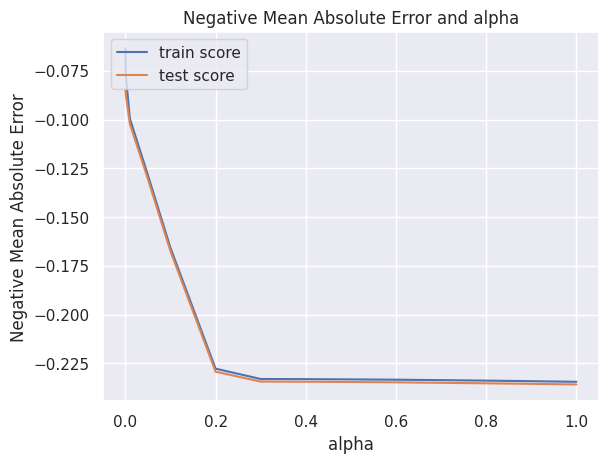

In [130]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [131]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated
# At alpha  = 0.02  , negative mean absolute error stablizes and hence for a tradeoff between bias and variance we will go with 0.01

# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_


array([-2.03319271e-02,  0.00000000e+00,  1.07535501e-02,  1.18265101e-01,
        4.95018954e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.07537554e-05,  2.53050356e-02,  1.36705876e-03,  0.00000000e+00,
       -0.00000000e+00,  1.23603141e-01,  2.82534112e-02,  0.00000000e+00,
        4.43603313e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.34860975e-02,  2.45201421e-04,  3.89936698e-02,  8.32522295e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.61531922e-03,
       -1.66434510e-02, -4.19816466e-06, -3.76337325e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

Lasso brings coffecients of insignifacnt variables close to zero.

In [132]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8490540576487141
0.87248570735741


**Its cleary visible see not that r2_score for train and test is quite close and a pretty decent number o 84 +**

In [134]:
print('roor mean square error :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

roor mean square error : 0.14816457656818968


In [136]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']

Variable   Coeff
0     constant  11.684
1   MSSubClass  -0.020
2  LotFrontage   0.000
3      LotArea   0.011
4  OverallQual   0.118

In [139]:
parameters = para.sort_values((['Coeff']), axis = 0, ascending = False)
parameters


Variable   Coeff
0                 constant  11.684
14               GrLivArea   0.124
4              OverallQual   0.118
5              OverallCond   0.050
23              GarageArea   0.039
21              Fireplaces   0.033
15            BsmtFullBath   0.028
10             TotalBsmtSF   0.025
3                  LotArea   0.011
24              WoodDeckSF   0.008
17                FullBath   0.004
28             ScreenPorch   0.004
11                1stFlrSF   0.001
18                HalfBath   0.000
16            BsmtHalfBath   0.000
13            LowQualFinSF  -0.000
8               BsmtFinSF2   0.000
12                2ndFlrSF   0.000
9                BsmtUnfSF  -0.000
73    Neighborhood_Veenker   0.000
7               BsmtFinSF1   0.000
6               MasVnrArea   0.000
2              LotFrontage   0.000
25             OpenPorchSF  -0.000
20            KitchenAbvGr  -0.000
19            BedroomAbvGr   0.000
33             MSZoning_RH   0.000
22             GarageYrBlt   0.000
26           EnclosedPorch   0.000
42         LandContour_Low   0.000
27               3SsnPorch   0.000
30                 MiscVal  -0.000
32             MSZoning_FV   0.000
45           LotConfig_FR2  -0.000
34             MSZoning_RL   0.000
35             MSZoning_RM  -0.000
36              Alley_None  -0.000
37              Alley_Pave   0.000
38            LotShape_IR2   0.000
39            LotShape_IR3  -0.000
43         LandContour_Lvl  -0.000
65    Neighborhood_NridgHt   0.000
71    Neighborhood_StoneBr   0.000
56    Neighborhood_Edwards  -0.000
132    Exterior2nd_ImStucc   0.000
58     Neighborhood_IDOTRR  -0.000
46           LotConfig_FR3  -0.000
47        LotConfig_Inside  -0.000
48           LandSlope_Mod   0.000
49           LandSlope_Sev   0.000
50    Neighborhood_Blueste  -0.000
51     Neighborhood_BrDale  -0.000
52    Neighborhood_BrkSide   0.000
53    Neighborhood_ClearCr   0.000
54    Neighborhood_CollgCr  -0.000
55    Neighborhood_Crawfor   0.000
57    Neighborhood_Gilbert  -0.000
70    Neighborhood_Somerst   0.000
59    Neighborhood_MeadowV  -0.000
44       LotConfig_CulDSac   0.000
60    Neighborhood_Mitchel  -0.000
61      Neighborhood_NAmes  -0.000
62    Neighborhood_NPkVill  -0.000
63     Neighborhood_NWAmes  -0.000
64    Neighborhood_NoRidge   0.000
41         LandContour_HLS   0.000
66    Neighborhood_OldTown  -0.000
67      Neighborhood_SWISU   0.000
68     Neighborhood_Sawyer  -0.000
69    Neighborhood_SawyerW  -0.000
40            LotShape_Reg  -0.000
106       RoofMatl_Membran   0.000
131    Exterior2nd_HdBoard  -0.000
72     Neighborhood_Timber   0.000
101      RoofStyle_Gambrel   0.000
76         Condition1_PosA  -0.000
77         Condition1_PosN  -0.000
78         Condition1_RRAe  -0.000
79         Condition1_RRAn   0.000
80         Condition1_RRNe   0.000
81         Condition1_RRNn   0.000
82        Condition2_Feedr  -0.000
83         Condition2_Norm   0.000
84         Condition2_PosA   0.000
85         Condition2_PosN  -0.000
86         Condition2_RRAe  -0.000
87         Condition2_RRAn  -0.000
88         Condition2_RRNn  -0.000
89         BldgType_2fmCon   0.000
90         BldgType_Duplex  -0.000
91          BldgType_Twnhs  -0.000
92         BldgType_TwnhsE  -0.000
93       HouseStyle_1.5Unf  -0.000
94       HouseStyle_1Story   0.000
95       HouseStyle_2.5Fin  -0.000
96       HouseStyle_2.5Unf  -0.000
97       HouseStyle_2Story  -0.000
98       HouseStyle_SFoyer  -0.000
99         HouseStyle_SLvl   0.000
100        RoofStyle_Gable  -0.000
253  SaleCondition_Partial   0.000
102          RoofStyle_Hip   0.000
104         RoofStyle_Shed   0.000
75         Condition1_Norm   0.000
115     Exterior1st_CBlock   0.000
74        Condition1_Feedr  -0.000
103      RoofStyle_Mansard   0.000
105       RoofMatl_CompShg   0.000
134      Exterior2nd_Other   0.000
107         RoofMatl_Metal   0.000
108          RoofMatl_Roll   0.000
109       RoofMatl_Tar&Grv   0.000
110       RoofMatl_WdShake  -0.000
111       RoofMatl_WdShngl  

In [140]:
# Chose variables whose coefficients are non-zero
predicted_imp_params = pd.DataFrame(para[(para['Coeff'] != 0)])
predicted_imp_params

Variable   Coeff
0       constant  11.684
14     GrLivArea   0.124
4    OverallQual   0.118
5    OverallCond   0.050
23    GarageArea   0.039
21    Fireplaces   0.033
15  BsmtFullBath   0.028
10   TotalBsmtSF   0.025
3        LotArea   0.011
24    WoodDeckSF   0.008
17      FullBath   0.004
28   ScreenPorch   0.004
11      1stFlrSF   0.001
31   PropertyAge  -0.004
29      PoolArea  -0.017
1     MSSubClass  -0.020

In [141]:
predicted_imp_params.shape
# These 16 variables obtained from Lasso Regression have the strong effect on the SalePrice

(16, 2)

**Now lets use Ridge Regression  to predict variable**

In [143]:
from sklearn.linear_model import Ridge

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [144]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.052853      0.013907         0.019620        0.007773      0.0001   
1       0.060970      0.009726         0.025303        0.006633       0.001   
2       0.072928      0.012951         0.028973        0.004926        0.01   
3       0.061143      0.005358         0.026285        0.002113        0.05   
4       0.076048      0.007418         0.024573        0.007327         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.102247          -0.083723          -0.100904   
1   {'alpha': 0.001}          -0.102111          -0.083702          -0.100816   
2    {'alpha': 0.01}          -0.101795          -0.083618          -0.100452   
3    {'alpha': 0.05}          -0.101259          -0.083944          -0.100382   
4     {'alpha': 0.1}          -0.100916          -0.084724          -0.100132   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.095752          -0.087607        -0.094047        0.007283   
1          -0.095706          -0.087537        -0.093974        0.007252   
2          -0.095317          -0.087070        -0.093650        0.007202   
3          -0.093890          -0.085730        -0.093041        0.007188   
4          -0.092457          -0.084722        -0.092590        0.007071   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.055911           -0.060462   
1               25           -0.055951           -0.060474   
2               24           -0.056117           -0.060599   
3               23           -0.056892           -0.061188   
4               14           -0.057861           -0.061932   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.061087           -0.062029           -0.060163   
1           -0.061091           -0.062042           -0.060191   
2           -0.061147           -0.062124           -0.060353   
3           -0.061407           -0.062553           -0.061171   
4           -0.061687           -0.063158           -0.062061   

   mean_train_score  std_train_score  
0         -0.059930         0.002109  
1         -0.059950         0.002098  
2         -0.060068         0.002067  
3         -0.060642         0.001943  
4         -0.061340         0.001811

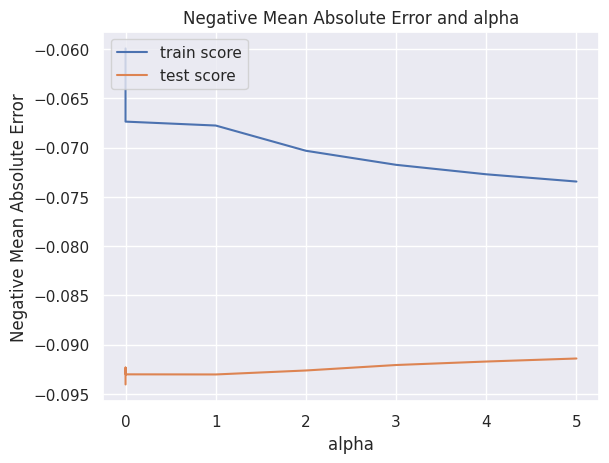

In [145]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

** Negative Mean Absolute Error stabilises at alpha = 2, hence we  will choose this for further analysis**

In [146]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.19106955e-02, -7.91938345e-03,  1.69082262e-02,  6.00328576e-02,
        4.62346612e-02, -2.45178406e-03,  1.87911570e-03,  7.38273606e-03,
        3.39608774e-06,  4.66439981e-03,  4.99906531e-02,  4.28335551e-02,
        3.73935867e-03,  7.35206931e-02,  2.48972702e-02,  2.00542907e-03,
        1.89271480e-02,  1.40051534e-02,  1.27317988e-02, -5.68838520e-03,
        1.14616999e-03, -1.89811938e-04,  3.20122752e-02,  1.07798602e-02,
        4.89048735e-04,  8.23021657e-03,  8.72901622e-03,  9.20240828e-03,
       -9.61791680e-03,  5.23645805e-06, -1.63718336e-03,  1.60952179e-01,
        1.43457783e-01,  1.49204373e-01,  1.23273332e-01, -5.29956055e-03,
        2.00662194e-02,  1.90689064e-02, -5.01149617e-02, -2.30177170e-03,
        5.33718814e-02,  6.34219615e-02,  5.75381322e-02,  2.83470542e-02,
       -4.90551192e-02, -5.58005535e-02, -1.27183132e-02,  2.20816852e-02,
       -2.06665156e-02, -4.48871613e-02, -5.52794798e-02,  8.42159587e-03,
        6.21512327e-02, -

In [147]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.85),
 ('MSSubClass', -0.022),
 ('LotFrontage', -0.008),
 ('LotArea', 0.017),
 ('OverallQual', 0.06),
 ('OverallCond', 0.046),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.002),
 ('BsmtFinSF2', 0.007),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.005),
 ('1stFlrSF', 0.05),
 ('2ndFlrSF', 0.043),
 ('LowQualFinSF', 0.004),
 ('GrLivArea', 0.074),
 ('BsmtFullBath', 0.025),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.019),
 ('HalfBath', 0.014),
 ('BedroomAbvGr', 0.013),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.001),
 ('GarageYrBlt', -0.0),
 ('GarageArea', 0.032),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.009),
 ('ScreenPorch', 0.009),
 ('PoolArea', -0.01),
 ('MiscVal', 0.0),
 ('PropertyAge', -0.002),
 ('MSZoning_FV', 0.161),
 ('MSZoning_RH', 0.143),
 ('MSZoning_RL', 0.149),
 ('MSZoning_RM', 0.123),
 ('Alley_None', -0.005),
 ('Alley_Pave', 0.02),
 ('LotShape_IR2', 0.019),
 ('LotShape_IR3', -0.05),
 ('LotShape_Reg', -0.002),
 ('LandCo

In [148]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9301725948660616
0.8767945566742384


In [149]:
print('Root mean square error :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root mean square error : 0.14563974137594754


**Its clearly visisble that ridge performed better than lasso regression**

In [152]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head()

Variable   Coeff
0          constant  11.850
32      MSZoning_FV   0.161
34      MSZoning_RL   0.149
243  SaleType_ConLD   0.148
33      MSZoning_RH   0.143

In [153]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                 constant  11.850
1               MSSubClass  -0.022
2              LotFrontage  -0.008
3                  LotArea   0.017
4              OverallQual   0.060
5              OverallCond   0.046
6               MasVnrArea  -0.002
7               BsmtFinSF1   0.002
8               BsmtFinSF2   0.007
10             TotalBsmtSF   0.005
11                1stFlrSF   0.050
12                2ndFlrSF   0.043
13            LowQualFinSF   0.004
14               GrLivArea   0.074
15            BsmtFullBath   0.025
16            BsmtHalfBath   0.002
17                FullBath   0.019
18                HalfBath   0.014
19            BedroomAbvGr   0.013
20            KitchenAbvGr  -0.006
21              Fireplaces   0.001
23              GarageArea   0.032
24              WoodDeckSF   0.011
26           EnclosedPorch   0.008
27               3SsnPorch   0.009
28             ScreenPorch   0.009
29                PoolArea  -0.010
31             PropertyAge  -0.002
32             MSZoning_FV   0.161
33             MSZoning_RH   0.143
34             MSZoning_RL   0.149
35             MSZoning_RM   0.123
36              Alley_None  -0.005
37              Alley_Pave   0.020
38            LotShape_IR2   0.019
39            LotShape_IR3  -0.050
40            LotShape_Reg  -0.002
41         LandContour_HLS   0.053
42         LandContour_Low   0.063
43         LandContour_Lvl   0.058
44       LotConfig_CulDSac   0.028
45           LotConfig_FR2  -0.049
46           LotConfig_FR3  -0.056
47        LotConfig_Inside  -0.013
48           LandSlope_Mod   0.022
49           LandSlope_Sev  -0.021
50    Neighborhood_Blueste  -0.045
51     Neighborhood_BrDale  -0.055
52    Neighborhood_BrkSide   0.008
53    Neighborhood_ClearCr   0.062
54    Neighborhood_CollgCr  -0.013
55    Neighborhood_Crawfor   0.131
56    Neighborhood_Edwards  -0.088
57    Neighborhood_Gilbert  -0.024
58     Neighborhood_IDOTRR  -0.087
59    Neighborhood_MeadowV  -0.158
60    Neighborhood_Mitchel  -0.038
61      Neighborhood_NAmes  -0.013
62    Neighborhood_NPkVill   0.019
63     Neighborhood_NWAmes  -0.015
64    Neighborhood_NoRidge   0.062
65    Neighborhood_NridgHt   0.106
66    Neighborhood_OldTown  -0.038
67      Neighborhood_SWISU   0.002
68     Neighborhood_Sawyer  -0.023
69    Neighborhood_SawyerW  -0.009
70    Neighborhood_Somerst   0.052
71    Neighborhood_StoneBr   0.116
72     Neighborhood_Timber  -0.002
73    Neighborhood_Veenker   0.062
74        Condition1_Feedr   0.005
75         Condition1_Norm   0.070
76         Condition1_PosA   0.013
77         Condition1_PosN  -0.013
78         Condition1_RRAe  -0.038
79         Condition1_RRAn   0.051
80         Condition1_RRNe  -0.005
81         Condition1_RRNn   0.041
82        Condition2_Feedr   0.089
83         Condition2_Norm   0.090
84         Condition2_PosA   0.095
85         Condition2_PosN  -0.372
86         Condition2_RRAe  -0.027
87         Condition2_RRAn  -0.005
88         Condition2_RRNn   0.056
89         BldgType_2fmCon   0.033
90         BldgType_Duplex   0.013
91          BldgType_Twnhs  -0.067
92         BldgType_TwnhsE  -0.023
93       HouseStyle_1.5Unf   0.005
94       HouseStyle_1Story   0.002
95       HouseStyle_2.5Fin  -0.059
96       HouseStyle_2.5Unf   0.019
97       HouseStyle_2Story  -0.015
98       HouseStyle_SFoyer   0.006
99         HouseStyle_SLvl   0.005
100        RoofStyle_Gable  -0.062
101      RoofStyle_Gambrel  -0.029
102          RoofStyle_Hip  -0.052
103      RoofStyle_Mansard   0.023
104         RoofStyle_Shed   0.029
105       RoofMatl_CompShg   0.103
106       RoofMatl_Membran   0.058
107         RoofMatl_Metal   0.029
108          RoofMatl_Roll   0.049
109       RoofMatl_Tar&Grv   0.052
110       RoofMatl_WdShake   0.028
111       RoofMatl_WdShngl   0.136
112    Exterior1st_AsphShn  -0.001
113    Exterior1st_BrkComm  -0.075
114    Exterior1st_BrkFace   0.079
115     Exterior1st_CBlock  -0.009
116    Exterior1st_CemntBd  -0.002
117    Exterior1st_HdBoard  

In [154]:
predRFE.shape

(246, 2)

**Observation**

**Althoug ridge performed better than lasso in terms of train and test score , but since lasso set insignificant coffiencnts to zero , its advised to go with lasso as it keeps the modle simple.   Ridge uses 246 cofficients compared to lasso using 16  predictor variables and its easy for bussiness to worry about 16 variables comapred to 246 varaibles**

In [156]:
### Assign the Features as x1, x2.....

predicted_imp_params.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15']), inplace = True)
predicted_imp_params

Variable   Coeff
C        constant  11.684
x1      GrLivArea   0.124
x2    OverallQual   0.118
x3    OverallCond   0.050
x4     GarageArea   0.039
x5     Fireplaces   0.033
x6   BsmtFullBath   0.028
x7    TotalBsmtSF   0.025
x8        LotArea   0.011
x9     WoodDeckSF   0.008
x10      FullBath   0.004
x11   ScreenPorch   0.004
x12      1stFlrSF   0.001
x13   PropertyAge  -0.004
x14      PoolArea  -0.017
x15    MSSubClass  -0.020

**Final infrence **

These variables have the highest impact on sales price


*   GrLivArea  - Above grade (ground) living area square feet
*   OverallQual - Rates the overall material and finish of the house
*   OverallCond - Rates the overall condition of the house
*   GarageArea- Size of garage in square feet
*   Fireplaces - Number of fireplaces
*   BsmtFullBath  - basement full washrooms
*   TotalBsmtSF - Total square feet of basement area

Some of the factors which reduces a decrease in sales price are:



*   Property Age  
*   PoolArea - Pool Area in sq feet
*   MSSubClass - Identifies the type of dwelling involved in the sale.













